In [29]:
import numpy as np
import os
from datetime import datetime
import h5py
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [65]:
res = "64_16_48"
uflux = "uflux8"

folder = f"/Users/georg/Studium/Master/Thesis/env/microhh/cases/test/snaps_{res}_{uflux}/npy_files/"

u = np.load(folder + "u_xz.npy")[729:].squeeze()
v = np.load(folder + "v_xz.npy")[729:].squeeze()
w = np.load(folder + "w_xz.npy")[729:].squeeze()
co2 = np.load(folder + "co2_xz.npy")[729:].squeeze()

print(u.shape)

(1000, 48, 64)


In [66]:
def shift(arr, n, axis=1):
    if isinstance(n, int):
        return np.roll(arr, -n, axis=axis)
    else:
        lower = int(n)
        remainder = n - lower
        arr_lower = np.roll(arr, -lower, axis=axis)
        arr_upper = np.roll(arr, -lower - 1, axis=axis)
        return (1 - remainder) * arr_lower + remainder * arr_upper

In [67]:
shifts = np.linspace(0, 15, 240, endpoint=False)
mins_u = []
mins_v = []
mins_w = []
for i in range(10, len(u)-1, 5):
    diffs = [np.mean((u[i] - shift(u[i+1], j))**2) for j in shifts]
    mins_u.append(shifts[np.argmin(diffs)])
    diffs = [np.mean((v[i] - shift(v[i+1], j))**2) for j in shifts]
    mins_v.append(shifts[np.argmin(diffs)])
    diffs = [np.mean((w[i] - shift(w[i+1], j))**2) for j in shifts]
    mins_w.append(shifts[np.argmin(diffs)])

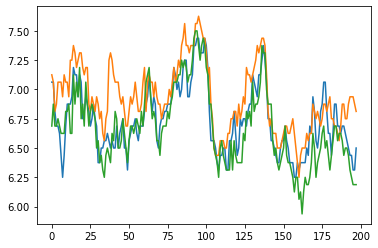

In [68]:
plt.plot(mins_u)
plt.plot(mins_v)
plt.plot(mins_w)
plt.show()

In [69]:
np.mean(mins_u), np.mean(mins_v), np.mean(mins_w)

(6.738636363636363, 6.928030303030303, 6.675820707070707)

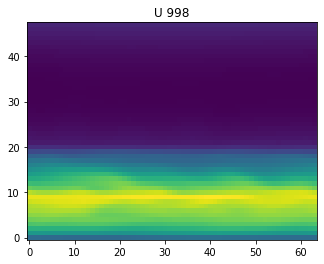

In [71]:
for i in range(0, len(u), 2):
    plt.imshow(shift(u[i], i*6.7), origin="lower")
    plt.title(f"U {i}")
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)